In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

from scipy.stats import pearsonr

%matplotlib inline

In [2]:
expDF = pd.read_csv('data/BehaviorSpace/phase_04/phase_04a.csv')

expDF.rename(columns={'(list (report-crimes-per-hour) (total-crimes))': 'results', 
                      '[step]':'step', '[run number]':'run_number'}, inplace=True)

In [3]:
# Getting the total of robberies
total_robberies_temp = expDF.results.str.split(']', expand=True)
# Converting all values to int and adding to the DF
expDF['num_crimes'] = total_robberies_temp[1].str.strip().astype(int)

In [4]:
# Convert the crimes distribution vector to a python list
expDF['crimes_dist'] = [list(map(int, i.split(' '))) for i in total_robberies_temp[0].str.split('[', expand=True)[2]]
# Delete the column results
expDF.drop(['results'], axis=1, inplace=True)

In [5]:
expDF.head(2)

,run_number,awareness-sf,motivation-sf,motivation-threshold,num-offenders,num-people,graphics-view,step,num_crimes,crimes_dist
0,1,0.8,0.01,0.9,10,10000,False,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,0.8,0.01,0.9,10,10000,False,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [6]:
# Get only the final step of the simulation
expDF_Final = expDF[expDF.step == max(expDF.step)]

In [7]:
expDF_Final.reset_index(drop=True, inplace=True)

In [8]:
expDF_Final

,run_number,awareness-sf,motivation-sf,motivation-threshold,num-offenders,num-people,graphics-view,step,num_crimes,crimes_dist
0,2,0.8,0.01,0.9,10,10000,False,52703,86,"[7, 5, 4, 1, 5, 3, 4, 0, 2, 0, 0, 0, 0, 4, 2, ..."
1,3,0.8,0.01,0.9,10,10000,False,52703,83,"[8, 3, 3, 3, 6, 4, 3, 0, 1, 0, 0, 0, 1, 1, 2, ..."
2,8,0.8,0.01,0.9,10,10000,False,52703,87,"[9, 1, 7, 3, 5, 2, 4, 1, 1, 0, 0, 0, 1, 2, 1, ..."
3,6,0.8,0.01,0.9,10,10000,False,52703,82,"[4, 6, 2, 2, 4, 7, 3, 1, 0, 0, 0, 0, 0, 1, 5, ..."
4,4,0.8,0.01,0.9,10,10000,False,52703,83,"[8, 3, 2, 3, 4, 3, 2, 0, 0, 0, 0, 0, 0, 2, 1, ..."
5,5,0.8,0.01,0.9,10,10000,False,52703,85,"[7, 5, 6, 0, 4, 6, 4, 0, 0, 0, 0, 0, 0, 3, 0, ..."
6,7,0.8,0.01,0.9,10,10000,False,52703,88,"[4, 0, 5, 3, 7, 3, 2, 0, 1, 0, 0, 2, 1, 4, 0, ..."
7,1,0.8,0.01,0.9,10,10000,False,52703,84,"[4, 5, 4, 2, 12, 8, 3, 0, 0, 0, 0, 0, 1, 1, 5,..."
8,9,0.8,0.01,0.9,10,10000,False,52703,83,"[6, 3, 6, 2, 6, 5, 1, 1, 1, 0, 0, 0, 1, 0, 4, ..."
9,10,0.8,0.01,0.9,10,10000,False,52703,88,"[8, 7, 5, 0, 3, 8, 2, 2, 0, 0, 0, 1, 1, 0, 1, ..."


In [9]:
empData = [13, 13, 19, 19, 9, 9, 2, 2, 1, 1, 3, 3, 5, 5, 4, 4, 4, 4, 9, 9, 25, 25, 19, 19]

In [10]:
corr, p_value = pearsonr(empData, expDF_Final.crimes_dist[0])
corr, p_value

(0.6364606754316545, 0.0008269087472287695)

Text(0, 0.5, 'Simulated Data')

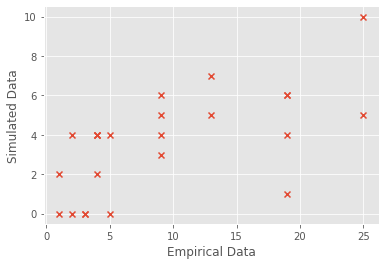

In [11]:
plt.scatter(empData, expDF_Final.crimes_dist[0], marker='x')
plt.xlabel('Empirical Data')
plt.ylabel('Simulated Data')

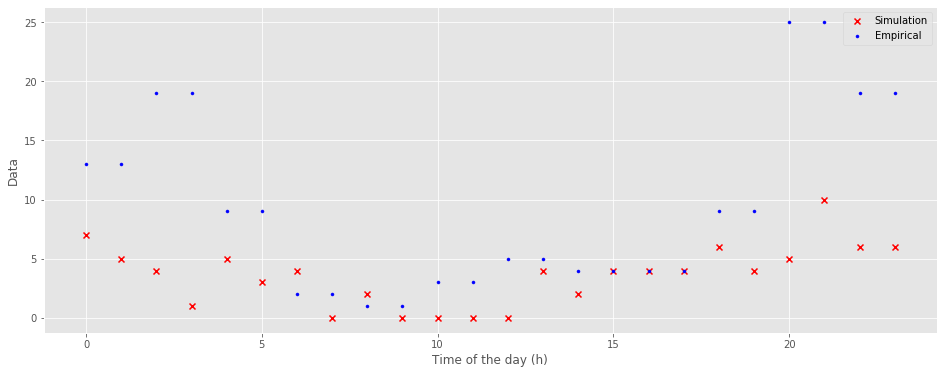

In [12]:
x = range(0,24)
plt.figure(figsize=((16,6)))
plt.scatter(x, expDF_Final.crimes_dist[0], marker='x', c='red', label='Simulation')
plt.xlabel('Time of the day (h)')
plt.ylabel('Data')
plt.scatter(x, empData, marker='.', c='blue', label='Empirical')
plt.legend()


In [13]:
expDF_Final['corr'] = [pearsonr(empData, row['crimes_dist'])[0] 
                       for index, row in expDF_Final.iterrows() ]
expDF_Final['p_value'] = [pearsonr(empData, row['crimes_dist'])[1] 
                          for index, row in expDF_Final.iterrows() ]

/Users/eric/Documents/CrimAI/code/Python/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/eric/Documents/CrimAI/code/Python/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
expDF_Final[['crimes_dist','corr', 'p_value']]

,crimes_dist,corr,p_value
0,"[7, 5, 4, 1, 5, 3, 4, 0, 2, 0, 0, 0, 0, 4, 2, ...",0.636461,0.000827
1,"[8, 3, 3, 3, 6, 4, 3, 0, 1, 0, 0, 0, 1, 1, 2, ...",0.579552,0.002997
2,"[9, 1, 7, 3, 5, 2, 4, 1, 1, 0, 0, 0, 1, 2, 1, ...",0.573354,0.003401
3,"[4, 6, 2, 2, 4, 7, 3, 1, 0, 0, 0, 0, 0, 1, 5, ...",0.619913,0.001233
4,"[8, 3, 2, 3, 4, 3, 2, 0, 0, 0, 0, 0, 0, 2, 1, ...",0.697836,0.000150
5,"[7, 5, 6, 0, 4, 6, 4, 0, 0, 0, 0, 0, 0, 3, 0, ...",0.606896,0.001664
6,"[4, 0, 5, 3, 7, 3, 2, 0, 1, 0, 0, 2, 1, 4, 0, ...",0.664125,0.000402
7,"[4, 5, 4, 2, 12, 8, 3, 0, 0, 0, 0, 0, 1, 1, 5,...",0.397094,0.054687
8,"[6, 3, 6, 2, 6, 5, 1, 1, 1, 0, 0, 0, 1, 0, 4, ...",0.497418,0.013393
9,"[8, 7, 5, 0, 3, 8, 2, 2, 0, 0, 0, 1, 1, 0, 1, ...",0.561935,0.004267


In [15]:
list(expDF_Final[expDF_Final.p_value < 0.1].crimes_dist)

[[7, 5, 4, 1, 5, 3, 4, 0, 2, 0, 0, 0, 0, 4, 2, 4, 4, 4, 6, 4, 5, 10, 6, 6],
 [8, 3, 3, 3, 6, 4, 3, 0, 1, 0, 0, 0, 1, 1, 2, 3, 6, 3, 5, 8, 6, 6, 4, 7],
 [9, 1, 7, 3, 5, 2, 4, 1, 1, 0, 0, 0, 1, 2, 1, 1, 6, 6, 6, 3, 2, 8, 9, 9],
 [4, 6, 2, 2, 4, 7, 3, 1, 0, 0, 0, 0, 0, 1, 5, 1, 2, 2, 5, 7, 9, 5, 12, 4],
 [8, 3, 2, 3, 4, 3, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 5, 4, 4, 9, 7, 9, 10, 6],
 [7, 5, 6, 0, 4, 6, 4, 0, 0, 0, 0, 0, 0, 3, 0, 3, 4, 4, 6, 7, 4, 8, 7, 7],
 [4, 0, 5, 3, 7, 3, 2, 0, 1, 0, 0, 2, 1, 4, 0, 1, 4, 7, 6, 6, 6, 11, 9, 6],
 [4, 5, 4, 2, 12, 8, 3, 0, 0, 0, 0, 0, 1, 1, 5, 4, 2, 5, 5, 2, 5, 4, 3, 9],
 [6, 3, 6, 2, 6, 5, 1, 1, 1, 0, 0, 0, 1, 0, 4, 1, 4, 7, 5, 10, 5, 6, 5, 4],
 [8, 7, 5, 0, 3, 8, 2, 2, 0, 0, 0, 1, 1, 0, 1, 2, 4, 4, 4, 8, 8, 4, 12, 4]]

In [16]:
expDF_Final[expDF_Final.p_value < 0.05]

,run_number,awareness-sf,motivation-sf,motivation-threshold,num-offenders,num-people,graphics-view,step,num_crimes,crimes_dist,corr,p_value
0,2,0.8,0.01,0.9,10,10000,False,52703,86,"[7, 5, 4, 1, 5, 3, 4, 0, 2, 0, 0, 0, 0, 4, 2, ...",0.636461,0.000827
1,3,0.8,0.01,0.9,10,10000,False,52703,83,"[8, 3, 3, 3, 6, 4, 3, 0, 1, 0, 0, 0, 1, 1, 2, ...",0.579552,0.002997
2,8,0.8,0.01,0.9,10,10000,False,52703,87,"[9, 1, 7, 3, 5, 2, 4, 1, 1, 0, 0, 0, 1, 2, 1, ...",0.573354,0.003401
3,6,0.8,0.01,0.9,10,10000,False,52703,82,"[4, 6, 2, 2, 4, 7, 3, 1, 0, 0, 0, 0, 0, 1, 5, ...",0.619913,0.001233
4,4,0.8,0.01,0.9,10,10000,False,52703,83,"[8, 3, 2, 3, 4, 3, 2, 0, 0, 0, 0, 0, 0, 2, 1, ...",0.697836,0.000150
5,5,0.8,0.01,0.9,10,10000,False,52703,85,"[7, 5, 6, 0, 4, 6, 4, 0, 0, 0, 0, 0, 0, 3, 0, ...",0.606896,0.001664
6,7,0.8,0.01,0.9,10,10000,False,52703,88,"[4, 0, 5, 3, 7, 3, 2, 0, 1, 0, 0, 2, 1, 4, 0, ...",0.664125,0.000402
8,9,0.8,0.01,0.9,10,10000,False,52703,83,"[6, 3, 6, 2, 6, 5, 1, 1, 1, 0, 0, 0, 1, 0, 4, ...",0.497418,0.013393
9,10,0.8,0.01,0.9,10,10000,False,52703,88,"[8, 7, 5, 0, 3, 8, 2, 2, 0, 0, 0, 1, 1, 0, 1, ...",0.561935,0.004267


In [17]:
results_list = np.array(expDF_Final.crimes_dist)
results_list = [np.asarray(i) for i in results_list]
results_df = pd.DataFrame(results_list)
results_df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,7,5,4,1,5,3,4,0,2,0,...,2,4,4,4,6,4,5,10,6,6
1,8,3,3,3,6,4,3,0,1,0,...,2,3,6,3,5,8,6,6,4,7
2,9,1,7,3,5,2,4,1,1,0,...,1,1,6,6,6,3,2,8,9,9
3,4,6,2,2,4,7,3,1,0,0,...,5,1,2,2,5,7,9,5,12,4
4,8,3,2,3,4,3,2,0,0,0,...,1,1,5,4,4,9,7,9,10,6


In [18]:
mean_results = list(results_df.mean())

In [19]:
pearsonr(empData, mean_results)

(0.6995888949274897, 0.00014201132771743394)